In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Load dataset
df = pd.read_csv(r"C:\Users\grace\Downloads\Wine_clust.csv")

In [2]:
print("Shape of Dataset:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Shape of Dataset: (178, 13)

Missing Values:
 Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Summary Statistics:
           Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.83

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [4]:
inertia = []
silhouette = []
k_range = range(2, 11)

##kMeans

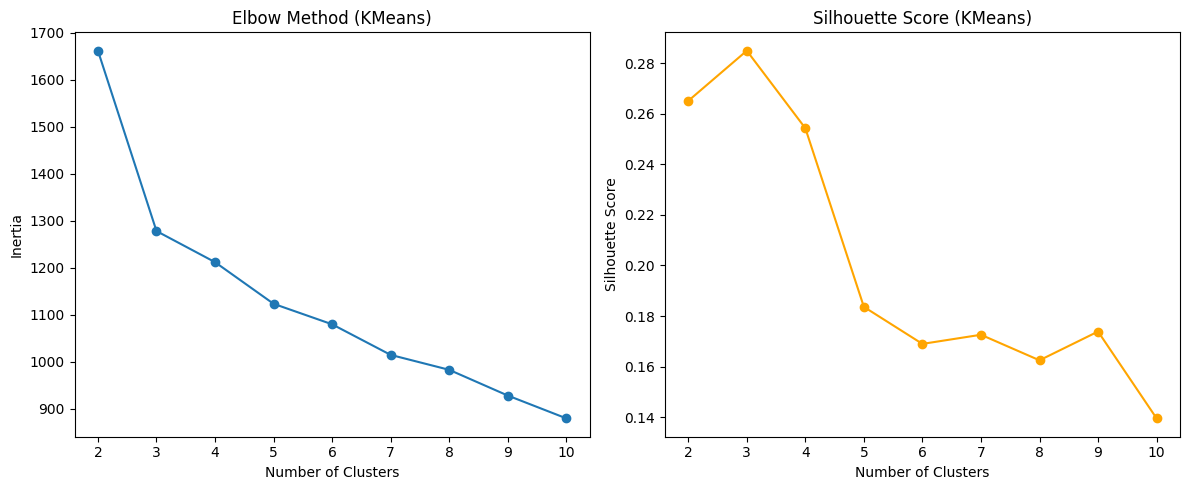

In [5]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow & Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method (KMeans)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, marker='o', color='orange')
plt.title("Silhouette Score (KMeans)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)


##Agglomerative Clustering

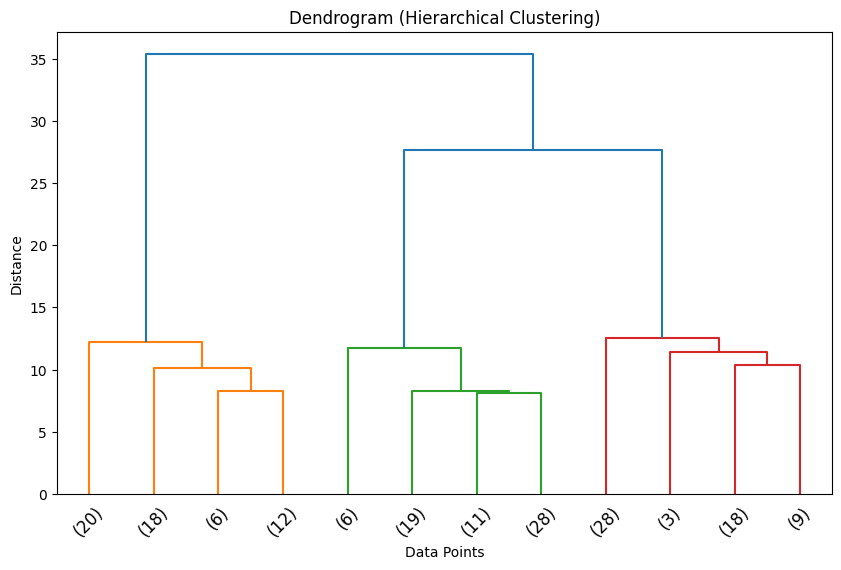

In [ ]:

plt.figure(figsize=(10, 6))
linkage_matrix = linkage(scaled_data, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12.)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Final Agglomerative Clustering with 3 clusters
agg = AgglomerativeClustering(n_clusters=3)
df['Agglomerative_Cluster'] = agg.fit_predict(scaled_data)

In [9]:
kmeans_sil = silhouette_score(scaled_data, df['KMeans_Cluster'])
agglo_sil = silhouette_score(scaled_data, df['Agglomerative_Cluster'])

print(f"Silhouette Score (KMeans): {kmeans_sil:.4f}")
print(f"Silhouette Score (Agglomerative Clustering): {agglo_sil:.4f}")

Silhouette Score (KMeans): 0.2849
Silhouette Score (Agglomerative Clustering): 0.2774


kMeans have slightly higher score, so it is better